In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('./analysis/')

%load_ext autoreload
%autoreload 2
import utils
from utils import RECENT_DATE_THRESHOLD

In [2]:
lm_metadata = utils.load_annotated_lm_metadata()
display(lm_metadata.sample(5))

,id,authors,title,categories,abstract,versions,first_category,v1_date,LM_related_terms,mentions_LM_keyword,cluster,domains,industry,academic,above_pred_female_threshold,inferred_female_frac_nqg_uncertainty_threshold_0.100,citationCount,percentile_rank_in_3_month_window,percentile_rank_in_12_month_window
10022,arXiv:2211.13892,"[Xi Ye, Srinivasan Iyer, Asli Celikyilmaz, Ves...",Complementary Explanations for Effective In-Co...,[cs.CL],Large language models (LLMs) have exhibited ...,"[{'version': 'v1', 'created': 'Fri, 25 Nov 202...",cs.CL,2022-11-25 04:40:47,"[language model, large language model]",True,Interpretability & Reasoning,"[utexas.edu, fb.com]",True,True,False,0.2,27.0,0.925639,0.893379
5537,arXiv:2109.05979,"[Oleg Borisov, Mohammad Aliannejadi, Fabio Cre...",Keyword Extraction for Improved Document Retri...,"[cs.CL, cs.IR]",Recent research has shown that mixed-initiat...,"[{'version': 'v1', 'created': 'Mon, 13 Sep 202...",cs.CL,2021-09-13 13:55:37,[BERT],True,Question Answering & Retrieval,"[uva.nl, usi.ch]",False,True,False,0.0,2.0,0.187656,0.189171
2416,arXiv:2007.13968,"[Li Yuan, Jin Wang, Xuejie Zhang]",YNU-HPCC at SemEval-2020 Task 8: Using a Paral...,[cs.CL],"In recent years, the growing ubiquity of Int...","[{'version': 'v1', 'created': 'Tue, 28 Jul 202...",cs.CL,2020-07-28 03:20:31,[BERT],True,Emotion/Sentiment Analysis,[ynu.edu.cn],False,False,NaN,NaN,5.0,0.315502,0.245936
7312,arXiv:2204.01694,"[Niv Cohen, Rinon Gal, Eli A. Meirom, Gal Chec...","""This is my unicorn, Fluffy"": Personalizing fr...","[cs.CV, cs.LG]",Large Vision & Language models pretrained on...,"[{'version': 'v1', 'created': 'Mon, 4 Apr 2022...",cs.CV,2022-04-04 17:58:11,[language model],True,Vision-Language Models,[huji.ac.il],False,True,False,0.0,28.0,0.890865,0.897910
15611,arXiv:2307.10631,"[Zhiwei Fu, Steven H. H. Ding, Furkan Alaca, B...",Pluvio: Assembly Clone Search for Out-of-domai...,"[cs.SE, cs.AI]",The practice of code reuse is crucial in sof...,"[{'version': 'v1', 'created': 'Thu, 20 Jul 202...",cs.SE,2023-07-20 06:55:37,[language model],True,Code Generation,"[queensu.ca, mcgill.ca, ecn.forces.gc.ca]",False,True,False,0.0,0.0,0.353985,0.228022


## Changes in 2023 vs. 2018-22

### Topic changes

In [3]:
lm_metadata['post_2023'] = (lm_metadata['v1_date'] >= RECENT_DATE_THRESHOLD)

In [6]:
recent_topic_df = utils.get_topic_counts_by_binary_variable(lm_metadata, 'post_2023')
recent_topic_df.head(5)

,topic,ratio,count_true,count_false,p_topic_if_true,p_topic_if_false,p_chi2
1,Applications of LLMs/ChatGPT,7.836745,"(463, 6427)","(97, 10552)",0.072040,0.009193,3.728690e-109
29,"Software, Planning, Robotics",4.279810,"(232, 6427)","(89, 10552)",0.036098,0.008434,2.147377e-37
12,Human Feedback & Interaction,4.235429,"(178, 6427)","(69, 10552)",0.027696,0.006539,1.236247e-28
28,Societal Implications of LLMs,3.694103,"(207, 6427)","(92, 10552)",0.032208,0.008719,3.025541e-29
16,"LLMs, Reasoning, Chain-of-Thought",3.446204,"(424, 6427)","(202, 10552)",0.065972,0.019143,2.687501e-55


Chi2 test for BERT & Embeddings: p = 3.182e-50 (not multiple hypothesis corrected)
Chi2 test for Multilingual Transfer Learning: p = 2.122e-24 (not multiple hypothesis corrected)
Chi2 test for Transformer/RNN Architectures: p = 8.741e-15 (not multiple hypothesis corrected)
Chi2 test for Speech Recognition: p = 1.361e-22 (not multiple hypothesis corrected)
Chi2 test for Spelling & Grammar Correction: p = 1.101e-04 (not multiple hypothesis corrected)
Chi2 test for Reasoning & Chain-of-Thought: p = 2.688e-55 (not multiple hypothesis corrected)
Chi2 test for Societal Implications of LLMs: p = 3.026e-29 (not multiple hypothesis corrected)
Chi2 test for Human Feedback & Interaction: p = 1.236e-28 (not multiple hypothesis corrected)
Chi2 test for Software, Planning, Robotics: p = 2.147e-37 (not multiple hypothesis corrected)
Chi2 test for Applications of LLMs/ChatGPT: p = 3.729e-109 (not multiple hypothesis corrected)


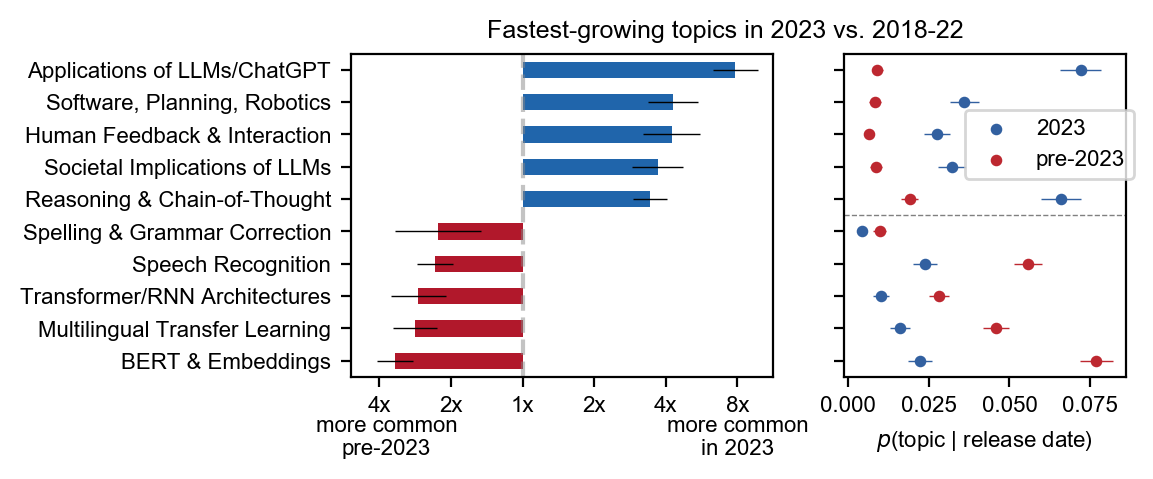

In [8]:
f, (enrich, dot) = utils.enrichment_plot_and_dotplot(
    recent_topic_df,
    bar_names_col='topic',
    neg_label='more common\npre-2023',
    pos_label='more common\nin 2023',
    true_label='2023',
    false_label='pre-2023',
    legend_coords=(0.39, 0.86),
    width_ratios=(3, 2),
    manual_enrichment_xlim=(2.4, 3.5),
    dotplot_xlabel=r'$p$(topic | release date)',
)

f.suptitle("Fastest-growing topics in 2023 vs. 2018-22", y=0.96, fontsize=9)
f.savefig('./analysis/figures/topic_barplot_2023_growth.pdf', bbox_inches='tight', dpi=300)
plt.show()

In [10]:
latex_df = recent_topic_df[['topic', 
                            'ratio', 
                            'p_topic_if_true', 
                            'p_topic_if_false', 
                            'p_chi2']].sort_values(by='ratio', ascending=False).copy()

latex_df['size'] = latex_df['topic'].apply(lambda x: len(lm_metadata[lm_metadata['cluster'] == x]))
latex_df['topic'] = latex_df['topic'].apply(lambda x: utils.cluster_abbrevs_for_plotting[x] if x in utils.cluster_abbrevs_for_plotting else x)

# Convert table to latex
# Use different float format for each column
float_format = {'ratio': '{:,.2f}'.format,
                'p_topic_if_true': '{:,.3f}'.format,
                'p_topic_if_false': '{:,.3f}'.format,
                'p_chi2': '{:.1e}'.format,
                }

# Apply string formatting to each column
formatted_df = latex_df.copy()
for column, format_spec in float_format.items():
    formatted_df[column] = formatted_df[column].apply(format_spec)

# Make the 'size' column the 2nd column
cols = formatted_df.columns.tolist()
cols = cols[:1] + cols[-1:] + cols[1:-1]
formatted_df = formatted_df[cols]

formatted_df = formatted_df.rename(columns={'topic': 'Topic', 
                                    'size': 'N',
                                    'ratio': r'$\frac{p(\text{topic} \mid \text{since-2023})}{p(\text{topic} \mid \text{pre-2023})}$', 
                                    'p_topic_if_true': r'$p(\text{topic} \mid \text{since-2023})$', 
                                    'p_topic_if_false': r'$p(\text{topic} \mid \text{pre-2023})$', 
                                    'p_chi2': r'$p$-value'})

# Convert the formatted DataFrame to LaTeX
# Use styler
latex_table = formatted_df.to_latex(index=False, escape=True, column_format='lcccccc', bold_rows=True)
print(latex_table)

\begin{tabular}{lcccccc}
\toprule
                               Topic &   N & \$\textbackslash frac\{p(\textbackslash text\{topic\} \textbackslash mid \textbackslash text\{since-2023\})\}\{p(\textbackslash text\{topic\} \textbackslash mid \textbackslash text\{pre-2023\})\}\$ & \$p(\textbackslash text\{topic\} \textbackslash mid \textbackslash text\{since-2023\})\$ & \$p(\textbackslash text\{topic\} \textbackslash mid \textbackslash text\{pre-2023\})\$ & \$p\$-value \\
\midrule
        Applications of LLMs/ChatGPT & 560 &                                               7.84 &                                    0.072 &                                  0.009 &  3.7e-109 \\
        Software, Planning, Robotics & 321 &                                               4.28 &                                    0.036 &                                  0.008 &   2.1e-37 \\
        Human Feedback \& Interaction & 247 &                                               4.24 &                             

/tmp/ipykernel_3791024/190534217.py:37: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = formatted_df.to_latex(index=False, escape=True, column_format='lcccccc', bold_rows=True)


### sub-arXiv changes

Which sub-arXivs are being increasingly LLM-focused? That is, how is the proportion of papers on a sub-arXiv that are about LLMs changing?

Specifically, we'll compute $\frac{p(\text{paper is about LLMs} \mid \text{paper on sub-arXiv, published in 2023})}{p(\text{paper is about LLMs} \mid \text{paper on sub-arXiv, published pre-2023})}$.

In [8]:
metadata = utils.load_all_metadata().rename(columns={'v1_date': 'date'})

In [9]:
min_lm_papers_in_subarxiv = 50
lm_column = 'mentions_LM_keyword'

d = {'category': [], 'pre_all': [], 'pre_lm': [], 'post_all': [], 'post_lm': []}
for category in metadata.first_category.unique():
    if not category.startswith('cs.') and not category.startswith('stat.'):
        continue
    category_df = metadata[metadata.first_category == category]
    n_all_papers_in_subarxiv_pre = len(category_df[category_df.date < RECENT_DATE_THRESHOLD])
    n_all_papers_in_subarxiv_post = len(category_df[category_df.date >= RECENT_DATE_THRESHOLD])

    n_lm_papers_in_subarxiv_pre = len(category_df[(category_df.date < RECENT_DATE_THRESHOLD) & (category_df[lm_column] == True)])
    n_lm_papers_in_subarxiv_post = len(category_df[(category_df.date >= RECENT_DATE_THRESHOLD) & (category_df[lm_column] == True)])
    if n_lm_papers_in_subarxiv_pre + n_lm_papers_in_subarxiv_post < min_lm_papers_in_subarxiv:
        continue

    d['category'].append(category)
    d['pre_all'].append(n_all_papers_in_subarxiv_pre)
    d['post_all'].append(n_all_papers_in_subarxiv_post)
    d['pre_lm'].append(n_lm_papers_in_subarxiv_pre)
    d['post_lm'].append(n_lm_papers_in_subarxiv_post)
subarxiv_df = pd.DataFrame(d)

subarxiv_df['post_lm_frac'] = subarxiv_df['post_lm'] / subarxiv_df['post_all']
subarxiv_df['pre_lm_frac'] = subarxiv_df['pre_lm'] / subarxiv_df['pre_all']
subarxiv_df['ratio'] = subarxiv_df['post_lm_frac'] / subarxiv_df['pre_lm_frac']
subarxiv_df = subarxiv_df.sort_values(by='ratio', ascending=False)
subarxiv_df

,category,pre_all,pre_lm,post_all,post_lm,post_lm_frac,pre_lm_frac,ratio
11,cs.CY,5176,42,892,142,0.159193,0.008114,19.618621
2,cs.RO,12929,26,3115,102,0.032745,0.002011,16.282973
10,cs.HC,5265,49,1489,146,0.098052,0.009307,10.535629
5,cs.CR,11374,72,2086,112,0.053691,0.006330,8.481730
7,cs.AI,8812,187,2094,327,0.156160,0.021221,7.358748
9,cs.SE,6177,182,1417,264,0.186309,0.029464,6.323249
4,cs.CV,54071,585,12195,738,0.060517,0.010819,5.593493
6,cs.SI,4909,45,621,21,0.033816,0.009167,3.688996
1,cs.LG,51515,874,10618,512,0.048220,0.016966,2.842166
8,cs.SD,3578,94,798,54,0.067669,0.026272,2.575748


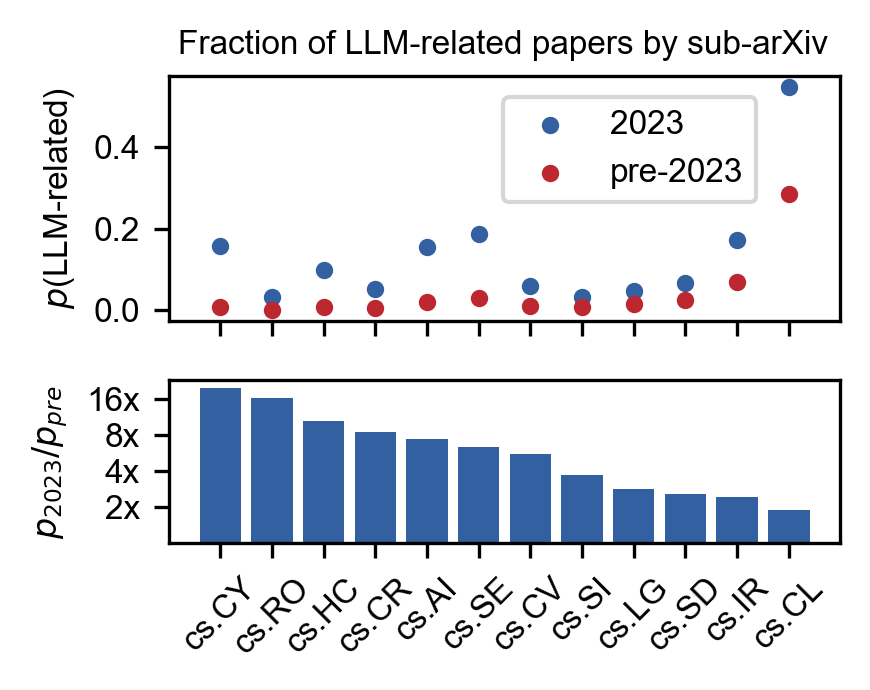

In [10]:
f, (ax0, ax1) = plt.subplots(2, 1, figsize=(3, 2.5), 
                             height_ratios=(3, 2), 
                             dpi=300, sharex=True)

# On the top plot, show dot plots of 'post_lm_frac' and 'pre_lm_frac'
# On the bottom plot, show a bar plot of the 'ratio' column
# Include the top k rows in the dataframe 'subarxiv_df'

top_k = 12

# Make the top plot
for i in range(top_k):
    category = subarxiv_df.iloc[i]['category']
    post_frac = subarxiv_df.iloc[i]['post_lm_frac']
    pre_frac = subarxiv_df.iloc[i]['pre_lm_frac']
    ax0.scatter(y=[post_frac], x=[category], color='#3260a0', marker='o', s=10)
    ax0.scatter(y=[pre_frac], x=[category], color='#bd2830', marker='o', s=10)

ax0.tick_params(axis='x', which='major', labelsize=8)
ax0.tick_params(axis='y', which='major', labelsize=8)
ax0.legend(['2023', 'pre-2023'], fontsize=8, loc='center right', bbox_to_anchor=(0.9, 0.7))
ax0.set_ylabel(r'$p$(LLM-related)', fontsize=8)

# Make the bottom plot
for i in range(top_k):
    # light orange color
    ax1.bar(x=subarxiv_df.iloc[i]['category'], height=np.log2(subarxiv_df.iloc[i]['ratio']), color='#3260a0')

# Add more ticks to the bottom plot: 0x, 5x, 10x, 15x
ax1.set_yticks([1, 2, 3, 4])

# Make the ticks 'x' after the number, so e.g. a ticklabel of '10' becomes '10x'
ax1.set_yticklabels([str(int(np.exp2(int(tick)))) + 'x' for tick in ax1.get_yticks()])

ax1.tick_params(axis='x', which='major', labelsize=8)
ax1.tick_params(axis='y', which='major', labelsize=8)
ax1.set_ylabel(r'$p_{2023} / p_{pre}$', fontsize=8)
# Rotate ax1 xticks by 90 degrees
for tick in ax1.get_xticklabels():
    tick.set_rotation(45)

f.suptitle("Fraction of LLM-related papers by sub-arXiv", y=0.9, x=0.575, fontsize=8)

plt.tight_layout()
plt.savefig('./analysis/figures/subarxiv_llm_growth_2023.pdf', bbox_inches='tight', dpi=300)
plt.show()

## Industry / Academic topics

We restrict only to papers with at least one affiliation in this analysis.

In [11]:
# Print counts of: (1) has any affiliation; (2) academic only; (3) industry only; (4) both (5) no affil
print("Any affiliation", len(lm_metadata[(lm_metadata.academic) | (lm_metadata.industry)]))
print("Academic only", len(lm_metadata[(lm_metadata.academic) & (~lm_metadata.industry)]))
print("Industry only", len(lm_metadata[(~lm_metadata.academic) & (lm_metadata.industry)]))
print("Both", len(lm_metadata[(lm_metadata.academic) & (lm_metadata.industry)]))
print("No affiliation", len(lm_metadata[(~lm_metadata.academic) & (~lm_metadata.industry)]))

Any affiliation 11627
Academic only 7853
Industry only 1690
Both 2084
No affiliation 5352


In [12]:
lm_metadata_with_affil = lm_metadata[(lm_metadata['academic']) | (lm_metadata['industry'])]
print(lm_metadata_with_affil.shape)

(11627, 20)


Chi2 test for Speech Recognition: p = 2.468e-30 (not multiple hypothesis corrected)
Chi2 test for Efficiency & Performance: p = 8.751e-21 (not multiple hypothesis corrected)
Chi2 test for Spelling & Grammar Correction: p = 8.191e-03 (not multiple hypothesis corrected)
Chi2 test for Transformer/RNN Architectures: p = 1.708e-04 (not multiple hypothesis corrected)
Chi2 test for Search & Retrieval: p = 1.389e-03 (not multiple hypothesis corrected)
Chi2 test for Biases & Harms: p = 2.146e-04 (not multiple hypothesis corrected)
Chi2 test for Toxicity & Hate Speech: p = 3.590e-03 (not multiple hypothesis corrected)
Chi2 test for Applications & Benchmark Evals: p = 9.173e-05 (not multiple hypothesis corrected)
Chi2 test for Social Media & Misinformation: p = 6.391e-07 (not multiple hypothesis corrected)
Chi2 test for Legal & Scientific Documents: p = 1.038e-03 (not multiple hypothesis corrected)


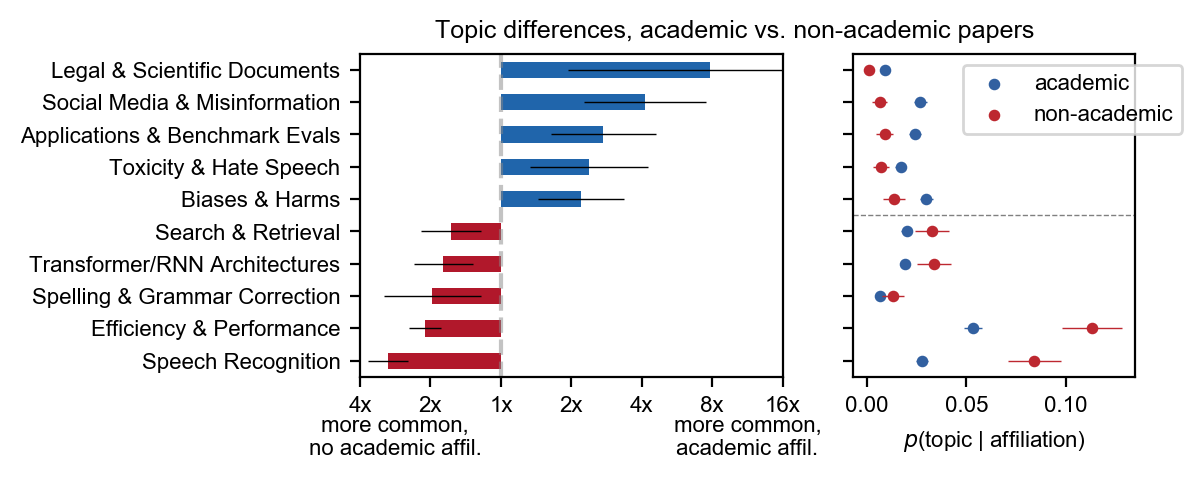

In [13]:
academic_topic_df = utils.get_topic_counts_by_binary_variable(lm_metadata_with_affil, 'academic')

# Only plot topics if the chi2 p-value is less than 1e-2
academic_topic_df_to_plot = academic_topic_df[academic_topic_df['p_chi2'] < 1e-2]

f, (enrich_ax, dot_ax) = utils.enrichment_plot_and_dotplot(
    academic_topic_df_to_plot,
    bar_names_col='topic',
    neg_label='more common,\nno academic affil.',
    pos_label='more common,\nacademic affil.',
    true_label='academic',
    false_label='non-academic',
    legend_coords=(0.35, 1),
    width_ratios=(3, 2),
    top_and_bottom_k=5,
    manual_enrichment_xlim=(2, 4),
    dotplot_xlabel=r'$p$(topic | affiliation)',
)

f.suptitle("Topic differences, academic vs. non-academic papers", y=0.96, fontsize=9)

f.savefig('./analysis/figures/topic_barplot_academic_affil.pdf',
          bbox_inches='tight', dpi=300)
plt.show()

Chi2 test for Legal & Scientific Documents: p = 1.091e-07 (not multiple hypothesis corrected)
Chi2 test for Social Media & Misinformation: p = 3.419e-15 (not multiple hypothesis corrected)
Chi2 test for Toxicity & Hate Speech: p = 1.274e-07 (not multiple hypothesis corrected)
Chi2 test for NLP for Healthcare: p = 2.287e-13 (not multiple hypothesis corrected)
Chi2 test for Emotion & Sentiment Analysis: p = 2.963e-06 (not multiple hypothesis corrected)
Chi2 test for Vision-Language Models: p = 1.109e-05 (not multiple hypothesis corrected)
Chi2 test for Search & Retrieval: p = 6.651e-05 (not multiple hypothesis corrected)
Chi2 test for Speech Recognition: p = 6.638e-15 (not multiple hypothesis corrected)
Chi2 test for Efficiency & Performance: p = 5.033e-26 (not multiple hypothesis corrected)
Chi2 test for Knowledge Distillation: p = 7.426e-08 (not multiple hypothesis corrected)


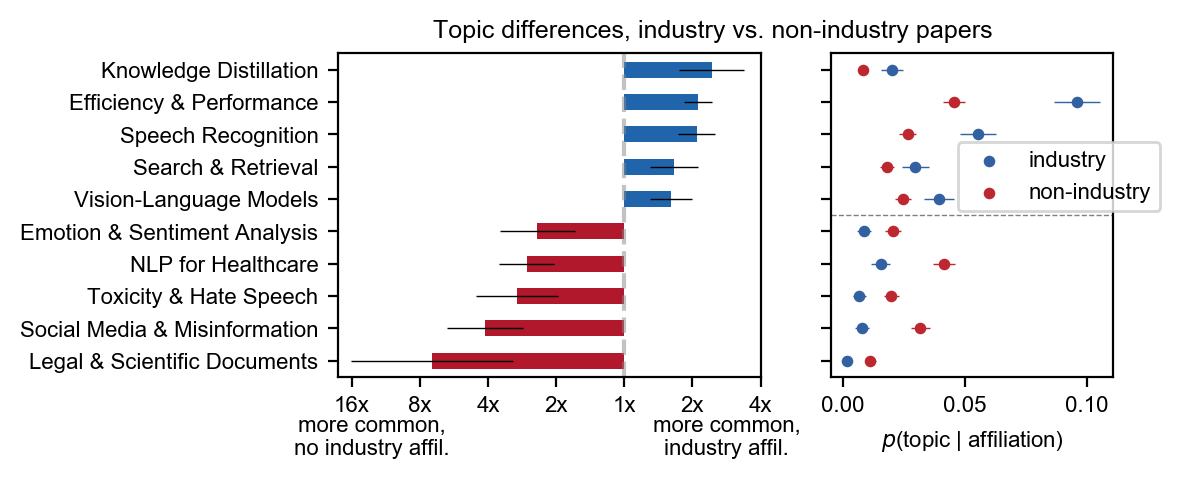

In [14]:
industry_topic_df = utils.get_topic_counts_by_binary_variable(lm_metadata_with_affil, 'industry')

# Only plot topics if the chi2 p-value is less than 1e-2
industry_topic_df_to_plot = industry_topic_df[industry_topic_df['p_chi2'] < 1e-2]

f, (enrich_ax, dot_ax) = utils.enrichment_plot_and_dotplot(
    industry_topic_df_to_plot,
    bar_names_col='topic',
    neg_label='more common,\nno industry affil.',
    pos_label='more common,\nindustry affil.',
    true_label='industry',
    false_label='non-industry',
    legend_coords=(0.41, 0.76),
    width_ratios=(3, 2),
    top_and_bottom_k=5,
    manual_enrichment_xlim=(4.2, 2),
    dotplot_xlabel=r'$p$(topic | affiliation)',
)

f.suptitle("Topic differences, industry vs. non-industry papers", y=0.96, fontsize=9)

f.savefig('./analysis/figures/topic_barplot_industry_affil.pdf',
            bbox_inches='tight', dpi=300)
plt.show()

## Majority predicted-female authors

In [15]:
gender_topic_df = utils.get_topic_counts_by_binary_variable(lm_metadata, 'above_pred_female_threshold')

In [16]:
gender_topic_df.head()

,topic,ratio,count_true,count_false,p_topic_if_true,p_topic_if_false,p_chi2
3,Biases & Harms,2.360577,"(140, 2658)","(290, 12997)",0.052671,0.022313,4.701753e-18
34,Toxicity & Hate Speech,1.911229,"(77, 2658)","(197, 12997)",0.028969,0.015157,1.135399e-06
8,Emotion/Sentiment Analysis,1.801493,"(84, 2658)","(228, 12997)",0.031603,0.017543,3.323498e-06
27,Social Media & Misinformation,1.773890,"(115, 2658)","(317, 12997)",0.043266,0.024390,8.897509e-08
5,Datasets & Benchmarks,1.405105,"(50, 2658)","(174, 12997)",0.018811,0.013388,3.981831e-02


Chi2 test for Transformer/RNN Architectures: p = 8.444e-05 (not multiple hypothesis corrected)
Chi2 test for Visual Foundation Models: p = 3.721e-03 (not multiple hypothesis corrected)
Chi2 test for Efficiency & Performance: p = 5.590e-08 (not multiple hypothesis corrected)
Chi2 test for Search & Retrieval: p = 3.052e-03 (not multiple hypothesis corrected)
Chi2 test for Software, Planning, Robotics: p = 7.738e-03 (not multiple hypothesis corrected)
Chi2 test for Dialogue & Conversational AI: p = 7.294e-03 (not multiple hypothesis corrected)
Chi2 test for Social Media & Misinformation: p = 8.898e-08 (not multiple hypothesis corrected)
Chi2 test for Emotion & Sentiment Analysis: p = 3.323e-06 (not multiple hypothesis corrected)
Chi2 test for Toxicity & Hate Speech: p = 1.135e-06 (not multiple hypothesis corrected)
Chi2 test for Biases & Harms: p = 4.702e-18 (not multiple hypothesis corrected)


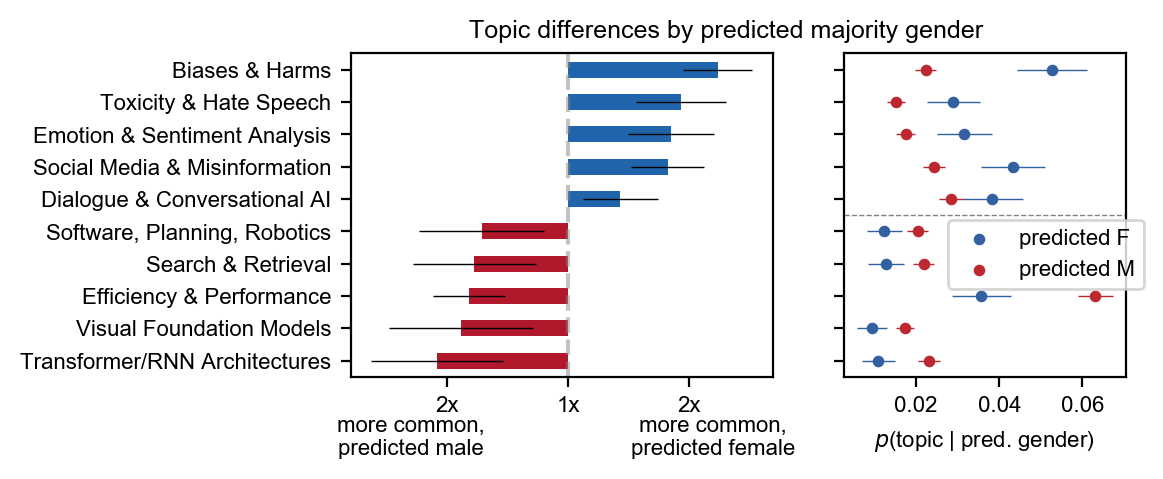

In [17]:
# Only plot topics if the chi2 p-value is less than 1e-2
gender_topic_df_to_plot = gender_topic_df[gender_topic_df['p_chi2'] < 1e-2]

f, (enrich_ax, dot_ax) = utils.enrichment_plot_and_dotplot(
    gender_topic_df_to_plot,
    bar_names_col='topic',
    neg_label='more common,\npredicted male',
    pos_label='more common,\npredicted female',
    true_label='predicted F',
    false_label='predicted M',
    legend_coords=(0.33, 0.52),
    width_ratios=(3, 2),
    manual_enrichment_xlim=(1.8, 1.7),
    dotplot_xlabel=r'$p$(topic | pred. gender)',
)

f.suptitle("Topic differences by predicted majority gender", y=0.96, fontsize=9)

f.savefig('./analysis/figures/topic_barplot_predicted_gender.pdf',
            bbox_inches='tight', dpi=300)
plt.show()

### Look at correlation between top predicted-female topics and top academic topics

In [23]:
from scipy.stats import pearsonr, spearmanr

print(spearmanr(industry_topic_df['ratio'], gender_topic_df.loc[industry_topic_df.index]['ratio']))
print(spearmanr(academic_topic_df['ratio'], gender_topic_df.loc[academic_topic_df.index]['ratio']))

SignificanceResult(statistic=-0.5076923076923078, pvalue=0.0008257876036758028)
SignificanceResult(statistic=0.46341463414634154, pvalue=0.002599607407110345)
